<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 0em;'>
	<h1>Trabalho de Inteligência Artificial</h1>
    <h3> <a href="https://github.com/amandakouchi">Amanda Kouchi</a> &#x25CF; <a href="https://github.com/biarog">Beatriz Rogers</a> &#x25CF; <a href="https://github.com/matteoavan">Matteo Savan</a> &#x25CF; <a href="https://github.com/RaulYKomai">Raul Y. Komai</a>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Algoritmos e Avaliação em Agrupamento</h2>

## Introdução

Neste *notebook*, será feito o uso de três algoritmos de agrupamento para podermos analisar cada um dos algorítmos e seus usos ideais. O banco de dados utilizado foi providenciado pela nossa Profª Drª Katti Facelli.

Os três algoritmos que faremos uso neste estudo são os seguintes: K-médias, Single-Link e Complete-Link.

---

## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.6` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](versão 3.9.2 ou superior): construção e exibição de gráficos variados
* [`numpy`](versão 2.1 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](versão 2.2.2 ou superior): manipulação de dados em formato de tabelas
* [`sklearn`](versão x.x ou superior): completar
* [`seaborn`]versão x.x ou superior): completar

A biblioteca [`os`](https://docs.python.org/3/library/os.html), para realizar tarefas específicas ao Sistema Operacional, também será utilizada. Por fazer parte da [Biblioteca Padrão de Python](https://docs.python.org/pt-br/3/library/), sua instalação não é necessária.

Serão utilizados também os conjuntos de dados disponibilizados junto com este *notebook*, que se encontram no diretório `datasets`, em formato de arquivo `.txt`.

In [3]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import cluster 
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
import seaborn as sns
import sys

%matplotlib inline

DATASETS_DIR = 'datasets'

In [4]:
## Função auxiliar para carregar dados
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [5]:
## Função auxiliar para plottar os dados de entrada
def plot_entry_data(data) -> None:
    X = data[['d1', 'd2']]
    plt.scatter(X["d1"],X["d2"], c="red")
    plt.xlabel("d1")
    plt.ylabel("d2")
    plt.show()

In [132]:
## Funcao auxiliar para definir o dataframe apos a agregacao
def create_df(data, clusters):
    df = pd.DataFrame(data)
    df.columns = ["d1","d2"]
    df["cluster"] = clusters
    
    return df

In [131]:
## Função auxiliar para plottar após funcao de agregacao
def plot_grouped_data(df, n_clusters) -> None:
    cores = sns.color_palette()[0:n_clusters]
    df = df.sort_values("sample_label")
    sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)
    plt.show()

In [8]:
## Funcao auxiliar de exportar arquivo
def export_dataframe(df, n_group, n_arquivo) -> None :
    select = ['sample_label', 'cluster']
    select = [x for x in df.columns if x in select]
    export = df[select]
    export.to_csv(n_arquivo + '_' + n_group + '.csv')

---
## K-médias

Adicionar descrição do processo de kmédias

In [205]:
## Entrada de dados
maxiter = 100000
k = 10
nome_arquivo = 'monkey'

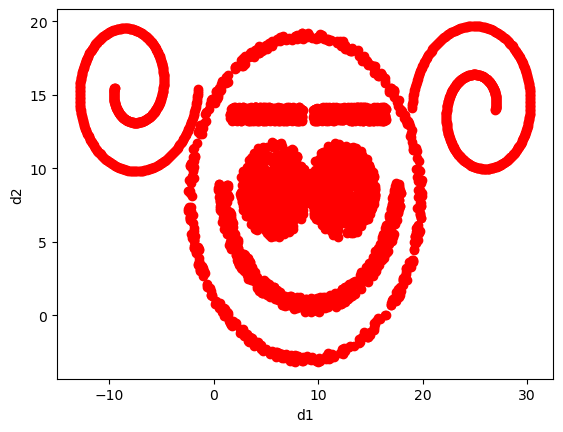

In [206]:
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [207]:
## Iniciar centróides
def initiate_centroids(k,dset):
    centroides = dset.sample(k)
    return centroides

np.random.seed(86)
centroids = initiate_centroids(k,X)

4000 [7 1 4 ... 2 2 2]


In [ ]:
## Função de distância
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [ ]:
## Atribuição de das amostras aos centróides
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

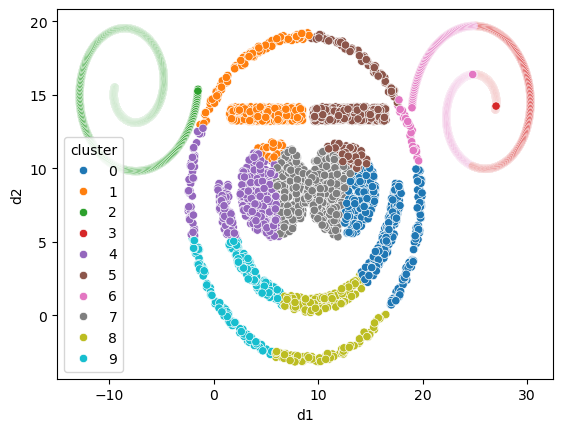

In [208]:
## Plotar após k-médias
df = pd.DataFrame(X)
df.columns = ['d1','d2', 'centroid', 'error']
cores = sns.color_palette()[0:k]
sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["centroid"], palette=cores)
plt.show()

In [209]:
## Exportar arquivo
select_ = ['sample_label', 'centroid']
select = [x for x in df.columns if x in select_]
export = df[select]
export.to_csv(nome_arquivo + '.csv')

---
## Single-Link

In [312]:
## Entrada de dados
numero_clusters = 5
nome_arquivo = 'c2ds1-2sp'

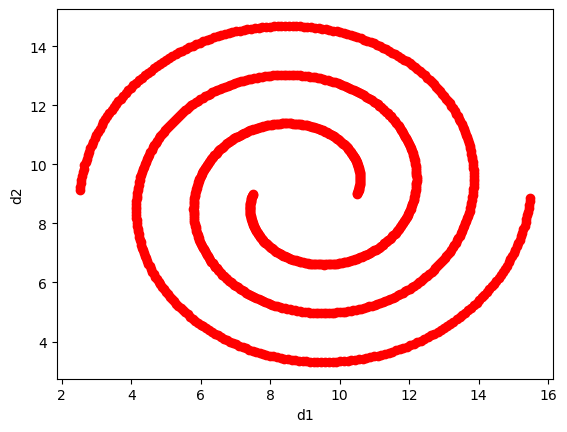

In [313]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [314]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(x=dados.values, y=dados.values)
matrix_base = np.full((len(matrix_despacial), len(matrix_despacial[0])), 1)

In [315]:
## Função de Single Link
def single_link(m_distancias:np, n_clusters:int):
    single = [-1]*len(m_distancias)
    total_clusters = len(m_distancias)
    counter:int = 0
    
    #print(total_clusters)
    
    while(total_clusters > n_clusters): 
        n_menos1 = 0
        line:int = 0
        column:int = 0
        
        cluster:bool = True
        
        shortest_dist = np.min(m_distancias[m_distancias>0])
        line = np.where(m_distancias == shortest_dist)[0][0]
        column = np.where(m_distancias == shortest_dist)[1][0]

        print("sd: ", shortest_dist)
        print("---linha : ", line, "---coluna : ", column)

        if single[line] < 0 and single[column] < 0:
            cluster = False
        
        if cluster:
            # Instancias onde o menor valor é repetido (no caso de ter um cluster sempre vai ter)
            tds_instancias = list(set(np.where(m_distancias == shortest_dist)[0]))
            print("instancias: ", tds_instancias)
            
            # Garantindo que sejam pegos 2 clusters distintos 
            prim_cluster_a_se_juntar = single[tds_instancias[0]] # seria o a
            seg_cluster_a_Se_juntar:int # isso seria o z do exemplo
            for n in tds_instancias:
                if single[n] != prim_cluster_a_se_juntar:
                    seg_cluster_a_Se_juntar = single[n]
                    break
            
            # Criando um vetor somente com os idxs dos clusters a serem utilizados
            instancias_usadas = []
            for n in tds_instancias:
                if single[n] == prim_cluster_a_se_juntar or single[n] == seg_cluster_a_Se_juntar:
                    instancias_usadas.append(n)                  
            
            # Pega o maior valor da tabela entre as colunas de cada instancia
            for col in range(m_distancias.shape[1]):
                menor = min(m_distancias[instancias_usadas, col])
                m_distancias[instancias_usadas, col] = menor
                m_distancias[col, instancias_usadas] = menor
            
            for n in instancias_usadas:
                if prim_cluster_a_se_juntar != -1:
                    single[n] = prim_cluster_a_se_juntar
                else:
                    single[n] = seg_cluster_a_Se_juntar
                
                matrix_despacial[n][instancias_usadas] = -single[n] -1   

        else :
            m_distancias[column][line] = m_distancias[line][column] = -counter - 1
            single[line] = single[column] = counter
            counter += 1
        
            for idx_x, x in enumerate(m_distancias[line]):
                if m_distancias[line][idx_x] <= m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                    m_distancias[column][idx_x] = m_distancias[idx_x][column] = m_distancias[line][idx_x]
                elif m_distancias[line][idx_x] > m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                    m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[column][idx_x]
        
        for x in single:
            if x == -1:
                n_menos1 += 1
        
        if n_menos1 > 0:
            total_clusters = len(set(single)) - 1 + n_menos1
        else:
            total_clusters = len(set(single))
        #print(total_clusters)
    
    for idx_n, n in enumerate(single):
        if n == -1:
            single[idx_n] = max(single) + 1
    
    return single

sd:  0.030078349575898555
---linha :  0 ---coluna :  111
sd:  0.03007834957589884
---linha :  501 ---coluna :  502
sd:  0.030257390568256725
---linha :  501 ---coluna :  503
instancias:  [501, 502, 503]
sd:  0.030257390568256996
---linha :  0 ---coluna :  222
instancias:  [0, 222, 111]
sd:  0.030433538514112034
---linha :  0 ---coluna :  333
instancias:  [0, 333, 111, 501, 502, 503, 504, 222]
sd:  0.030433538514112034
---linha :  0 ---coluna :  501
instancias:  [0, 333, 111, 501, 502, 503, 504, 222]
sd:  0.03061245132556364
---linha :  0 ---coluna :  444
instancias:  [0, 333, 111, 501, 502, 503, 504, 505, 444, 222]
sd:  0.0307923403625002
---linha :  0 ---coluna :  456
instancias:  [0, 456, 333, 111, 501, 502, 503, 504, 505, 506, 444, 222]
sd:  0.030968749474269055
---linha :  0 ---coluna :  467
instancias:  [0, 456, 333, 111, 467, 501, 502, 503, 504, 505, 506, 507, 444, 222]
sd:  0.031147911647492598
---linha :  0 ---coluna :  478
instancias:  [0, 478, 456, 333, 508, 111, 467, 501, 50

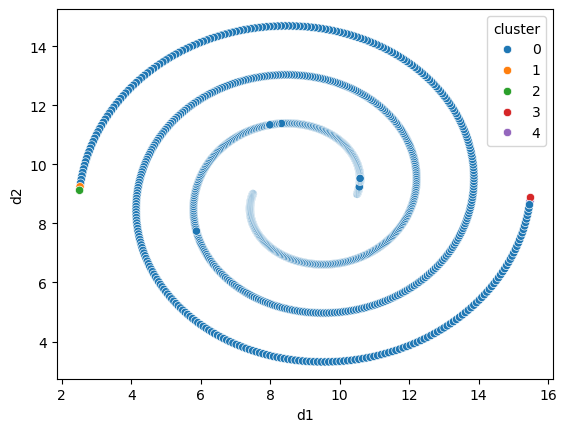

In [316]:
single = single_link(matrix_despacial, numero_clusters)
dataframe = create_df(data=dados, clusters=single)
plot_grouped_data(df=dataframe, n_clusters=numero_clusters)

In [ ]:
df = create_df(dados, numero_clusters)
plot_grouped_data(df, numero_clusters)
export_dataframe(df, 'single_link', nome_arquivo)

---
## Complete-Link

In [269]:
## Entrada de dados
numero_clusters = 5
nome_arquivo = 'monkey'

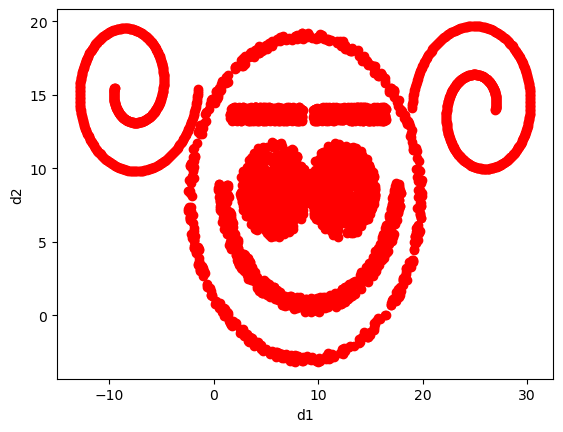

In [270]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [271]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(x=dados.values, y=dados.values)

In [272]:
## Função de Complete Link
def complete_link(m_distancias:np, n_clusters:int):
    complete = [-1]*len(m_distancias)
    total_clusters = len(m_distancias)
    counter:int = 0
    
    #print(total_clusters)
    
    while(total_clusters > n_clusters): 
        n_menos1 = 0
        line:int = 0
        column:int = 0
        
        cluster:bool = True
        
        shortest_dist = np.min(m_distancias[m_distancias>0])
        line = np.where(m_distancias == shortest_dist)[0][0]
        column = np.where(m_distancias == shortest_dist)[1][0]

        #print("sd: ", shortest_dist)
        
        #print("c1(linha): ", cluster1, "c2(coluna): ", cluster2)
        #print("---linha : ", line, "---coluna : ", column)

        if complete[line] < 0 and complete[column] < 0:
            cluster = False
        
        if cluster:
            # Instancias onde o menor valor é repetido (no caso de ter um cluster sempre vai ter)
            tds_instancias = list(set(np.where(m_distancias == shortest_dist)[0]))
            #print("instancias: ", tds_instancias)
            
            # Garantindo que sejam pegos 2 clusters distintos 
            prim_cluster_a_se_juntar = complete[tds_instancias[0]] # seria o a
            seg_cluster_a_Se_juntar:int # isso seria o z do exemplo
            for n in tds_instancias:
                if complete[n] != prim_cluster_a_se_juntar:
                    seg_cluster_a_Se_juntar = complete[n]
                    break
            
            # Criando um vetor somente com os idxs dos clusters a serem utilizados
            instancias_usadas = []
            for n in tds_instancias:
                if complete[n] == prim_cluster_a_se_juntar or complete[n] == seg_cluster_a_Se_juntar:
                    instancias_usadas.append(n)                  
            
            # Pega o maior valor da tabela entre as colunas de cada instancia
            for col in range(m_distancias.shape[1]):
                maior = max(m_distancias[instancias_usadas, col])
                m_distancias[instancias_usadas, col] = maior
                m_distancias[col, instancias_usadas] = maior
            
            for n in instancias_usadas:
                if prim_cluster_a_se_juntar != -1:
                    complete[n] = prim_cluster_a_se_juntar
                else:
                    complete[n] = seg_cluster_a_Se_juntar
                
                matrix_despacial[n][instancias_usadas] = -complete[n] -1   

        else :
            m_distancias[column][line] = m_distancias[line][column] = -counter - 1
            complete[line] = complete[column] = counter
            counter += 1
        
            for idx_x, x in enumerate(m_distancias[line]):
                if m_distancias[line][idx_x] >= m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                    m_distancias[column][idx_x] = m_distancias[idx_x][column] = m_distancias[line][idx_x]
                elif m_distancias[line][idx_x] < m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                    m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[column][idx_x]
        
        for x in complete:
            if x == -1:
                n_menos1 += 1
        
        if n_menos1 > 0:
            total_clusters = len(set(complete)) - 1 + n_menos1
        else:
            total_clusters = len(set(complete))
        #print(total_clusters)
    
    for idx_n, n in enumerate(complete):
        if n == -1:
            complete[idx_n] = max(complete) + 1
    
    return complete

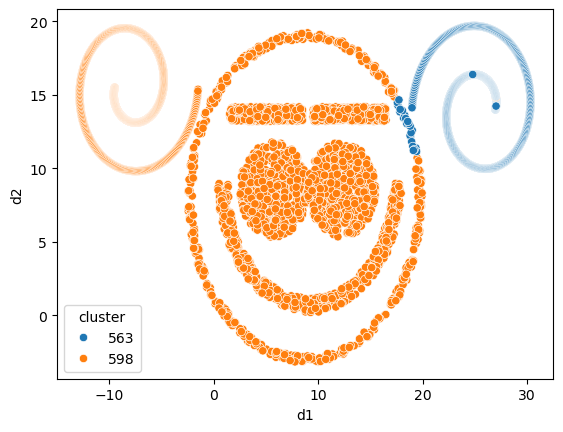

In [273]:
complete = complete_link(matrix_despacial, numero_clusters)
dataframe = create_df(data=dados, clusters=complete)

plot_grouped_data(df=dataframe, n_clusters=numero_clusters)

C:\Users\beatr\AppData\Local\Temp\ipykernel_32820\3471562122.py:5: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)


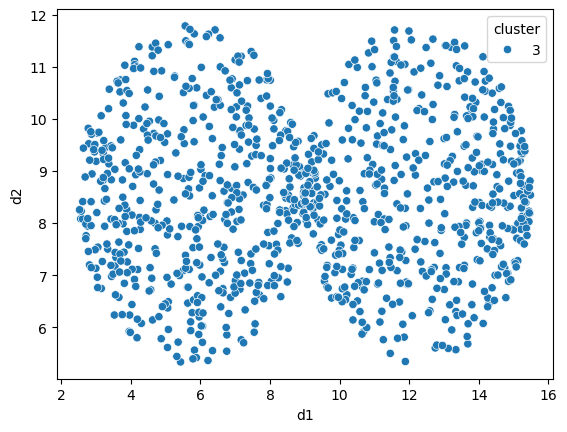

In [238]:
export_dataframe(df, 'complete_link', nome_arquivo)

---
## S-rand

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score

# abaixo é o que devemos fazer para um arquivo mas devemos fazer para os outros:

# pegando os dados:
resultado_correto = open('C:/Users/matte/OneDrive/UFSCAR/2024_1/IA/trabalho de ia/resultado_real.clu', 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento real
vetor_resultado_correto = []
resultado_alcancado = open('C:/Users/matte/OneDrive/UFSCAR/2024_1/IA/trabalho de ia/resultado_raul.clu', 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento que conseguimos em algum dos agrupamento que implementamos
vetor_resultado_alcancado = []

conteudo = resultado_alcancado.readline() #aqui lemos só para não pegar aquela primeira linha com a legenda das colunas

# coletando os dados do arquivo do que se espera:
while(True):
    conteudo = resultado_correto.readline() #lê linha

    if (not conteudo): #se alcançar o final do arquivo
        break #pare

    numero_cluster = conteudo[len(conteudo)-2] #descontamos 1 do \n e descontamos 1 para garantir a posição correta
    vetor_resultado_correto.append(numero_cluster)

# coletando os dados do arquivo do que se alcançou:
while(True):
    conteudo = resultado_alcancado.readline()
    if (not conteudo):
        break
    numero_cluster = conteudo[len(conteudo)-2]  
    vetor_resultado_alcancado.append(numero_cluster)

#para testar o vetores criados:
#print("PRINTANDO OS VETORES:")
#print(vetor_resultado_correto)
#print(vetor_resultado_alcancado)

rand = adjusted_rand_score(vetor_resultado_correto, vetor_resultado_alcancado)
print("indice Rand alcançado: " + str(rand))

---
## Conclusão